In [49]:
import cv2
import PIL
import numpy as np
from matplotlib import pyplot as plt

Part 1

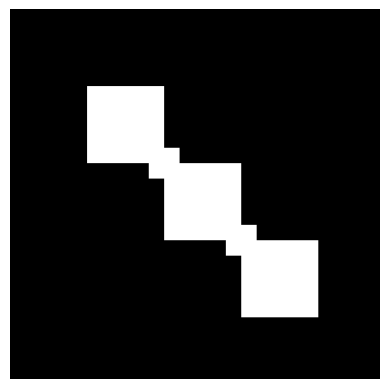

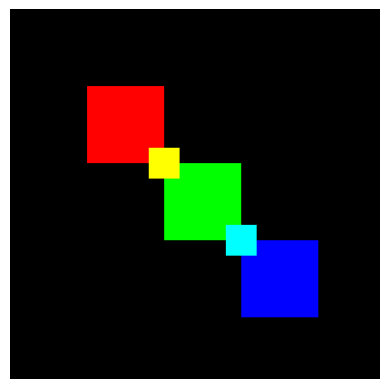

In [50]:
binImg = np.zeros((480, 480), dtype=np.uint8)

binImg[100:200, 100:200] = 1
binImg[200:300, 200:300] = 1
binImg[300:400, 300:400] = 1

binImg[180:220, 180:220] = 1
binImg[280:320, 280:320] = 1

plt.imshow(binImg, cmap='gray')
plt.axis('off')

colorImg = np.stack([binImg]*3, axis=2)
colorImg[100:200, 100:200, 0] = 255
colorImg[200:300, 200:300, 1] = 255
colorImg[300:400, 300:400, 2] = 255

colorImg[180:220, 180:220, 0] = 255
colorImg[180:220, 180:220, 1] = 255
colorImg[280:320, 280:320, 2] = 0

colorImg[280:320, 280:320, 0] = 0
colorImg[280:320, 280:320, 1] = 255
colorImg[280:320, 280:320, 2] = 255

plt.figure()
plt.imshow(colorImg)
plt.axis('off')
plt.show()

Part 2

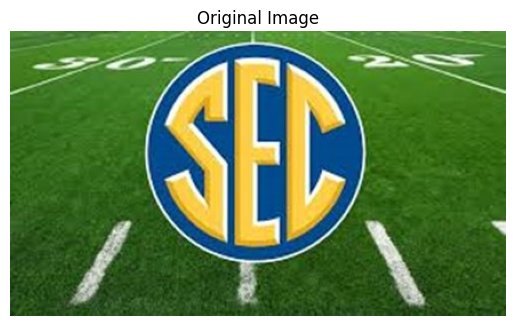

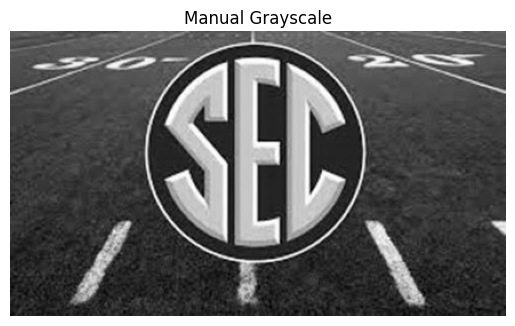

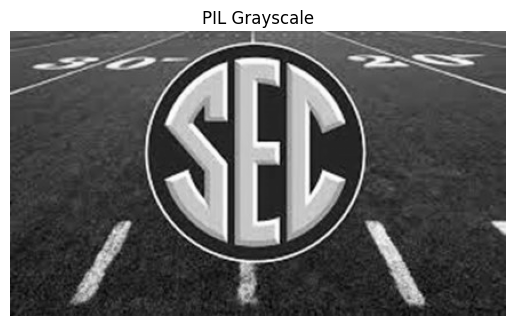

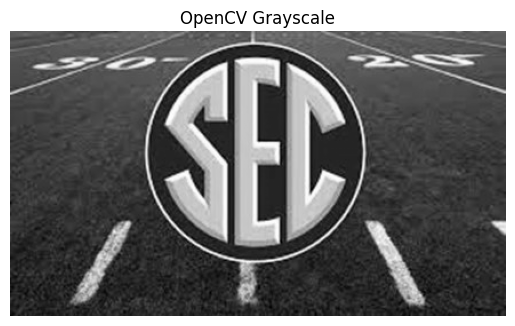

In [ ]:
baseImg = PIL.Image.open('part2.jpg').convert('RGB')
img = np.array(baseImg)

plt.figure()
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')
plt.show()

grayImg = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        grayImg[i, j] = int(0.2989 * img[i, j, 0] + 0.5870 * img[i, j, 1] + 0.1140 * img[i, j, 2])

plt.figure()
plt.title('Manual Grayscale')
plt.imshow(grayImg, cmap='gray')
plt.axis('off')
plt.show()

img = PIL.ImageOps.grayscale(baseImg)
img = np.array(img)

plt.figure()
plt.title('PIL Grayscale')
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

img = cv2.cvtColor(np.array(baseImg), cv2.COLOR_RGB2GRAY)

plt.figure()
plt.title('OpenCV Grayscale')
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

Part 3

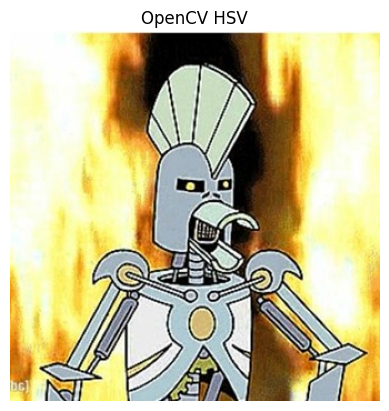

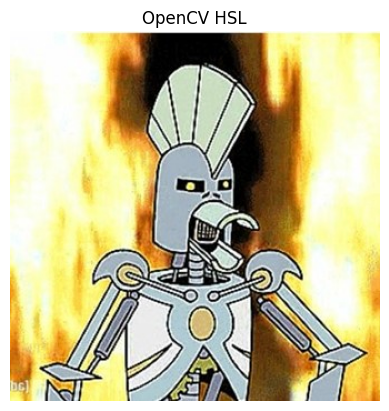

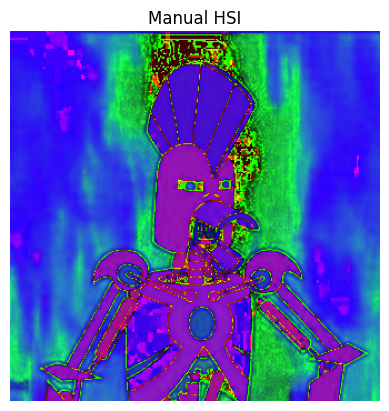

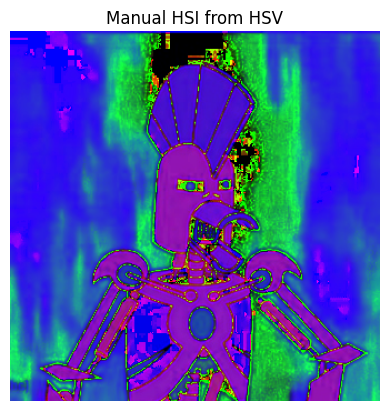

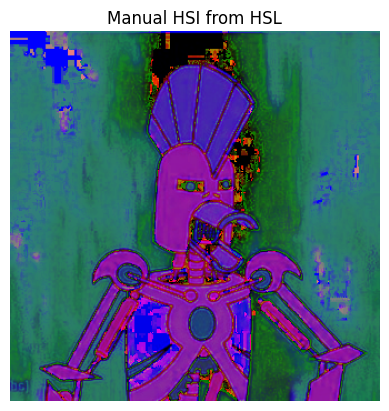

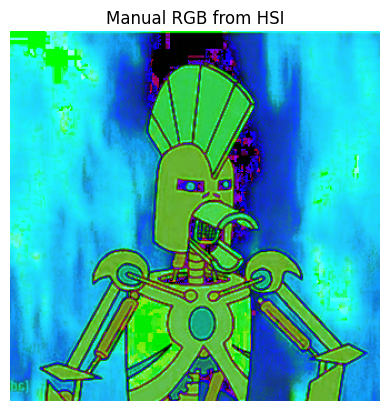

In [69]:
baseImg = cv2.cvtColor(cv2.imread('part3.jpg'), cv2.COLOR_BGR2RGB)

hsvCV = cv2.cvtColor(baseImg, cv2.COLOR_RGB2HSV)
plt.figure()
plt.title('OpenCV HSV')
plt.imshow(cv2.cvtColor(hsvCV, cv2.COLOR_HSV2RGB))
plt.axis('off')
plt.show()


hslCV = cv2.cvtColor(baseImg, cv2.COLOR_RGB2HLS)
plt.figure()
plt.title('OpenCV HSL')
plt.imshow(cv2.cvtColor(hslCV, cv2.COLOR_HLS2RGB))
plt.axis('off')
plt.show()


def rgbToHSI(img):
    img = img.astype(np.float32) / 255.0

    r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]

    intensity = np.mean(img, axis=2)
    saturation = 1 - ((np.min(img, axis=2) * 3) / (np.sum(img, axis=2) + 1e-10))

    # hue calc
    num = 0.5 * ((r - g) + (r - b))
    den = np.sqrt((r - g) ** 2 + (r - b) * (g - b) + 1e-10)
    theta = np.arccos(np.clip(num / den, -1, 1))

    hue = np.zeros_like(r)
    hue[b <= g] = theta[b <= g]
    hue[b > g] = 2 * np.pi - theta[b > g]
    hue = hue / (2 * np.pi)  # Normalize to [0, 1]

    hue = (hue * 255).astype(np.uint8)
    saturation = (saturation * 255).astype(np.uint8)
    intensity = (intensity * 255).astype(np.uint8)

    hsi = np.stack([hue, saturation, intensity], axis=2)
    return hsi

hsiDirect = rgbToHSI(baseImg)
plt.figure()
plt.title('Manual HSI')
plt.imshow(hsiDirect)
plt.axis('off')
plt.show()


def hsvToHSI(hsv):
    h = hsv[:, :, 0] / 180.0
    s = hsv[:, :, 1] / 255.0
    v = hsv[:, :, 2] / 255.0

    intensity = v * (1 - s / 2)

    saturation = np.where(intensity == 0, 0, 1 - (1 - s) * v / (intensity + 1e-10))

    hue = (h * 255).astype(np.uint8)
    saturation = (saturation * 255).astype(np.uint8)
    intensity = (intensity * 255).astype(np.uint8)

    hsi = cv2.merge([hue, saturation, intensity])
    return hsi

hsvCV = cv2.cvtColor(baseImg, cv2.COLOR_RGB2HSV)
hsiManual = hsvToHSI(hsvCV)

plt.figure()
plt.title('Manual HSI from HSV')
plt.imshow(hsiManual)
plt.axis('off')
plt.show()


def hslToHSI(hsl):
    h = hsl[:, :, 0] / 180.0
    l = hsl[:, :, 1] / 255.0
    s = hsl[:, :, 2] / 255.0

    intensity = l * (1 - s / 2)

    saturation = np.where(intensity == 0, 0, (l - intensity) / (l + 1e-10))

    hue = (h * 255).astype(np.uint8)
    saturation = (saturation * 255).astype(np.uint8)
    intensity = (intensity * 255).astype(np.uint8)

    hsi = cv2.merge([hue, saturation, intensity])
    return hsi

hslCV = cv2.cvtColor(baseImg, cv2.COLOR_RGB2HLS)
hsiManualHSL = hslToHSI(hslCV)
plt.figure()
plt.title('Manual HSI from HSL')
plt.imshow(hsiManualHSL)
plt.axis('off')
plt.show()

def hsiToRGB(hsi):
    return hsi

hsiCV = cv2.cvtColor(baseImg, cv2.COLOR_RGB2HLS)
rgbManual = hsiToRGB(hsiCV)
plt.figure()
plt.title('Manual RGB from HSI')
plt.imshow(rgbManual)
plt.axis('off')
plt.show()
